Read the file and check data

In [11]:
import pandas as pd
data = pd.read_csv("/Users/amberm/PycharmProjects/MLE/data_scientist/Iris.csv")
print("Shape of the data:")
data.shape



Shape of the data:


(150, 6)

In [2]:
# Data Type
type(data)
# data.dtypes


Data Type:


pandas.core.frame.DataFrame

In [3]:
# First 3 rows:
data.head(3)

First 3 rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
# keys, feature names, columns
# data.keys()
data.columns

The keys, feature names 


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Info of the data
data.info()
# view basic statistical details like percentile, mean, std etc. of iris data
# data.describe()

Info of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Missing values

1. isna() & isnull()
As we mentioned earlier, isna() and isnull() are essentially the same function. The only difference is that isnull() is a method of Pandas Series objects, while isna() is a method of both Series and DataFrame objects. 

In [14]:
data.isna()
# data.isna().sum()
# data.isna().count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [15]:
data["Id"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Id, Length: 150, dtype: bool

## Drop ID

In [18]:
new_data = data.drop('Id',axis=1)
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Observations

1. Observe the statistics 

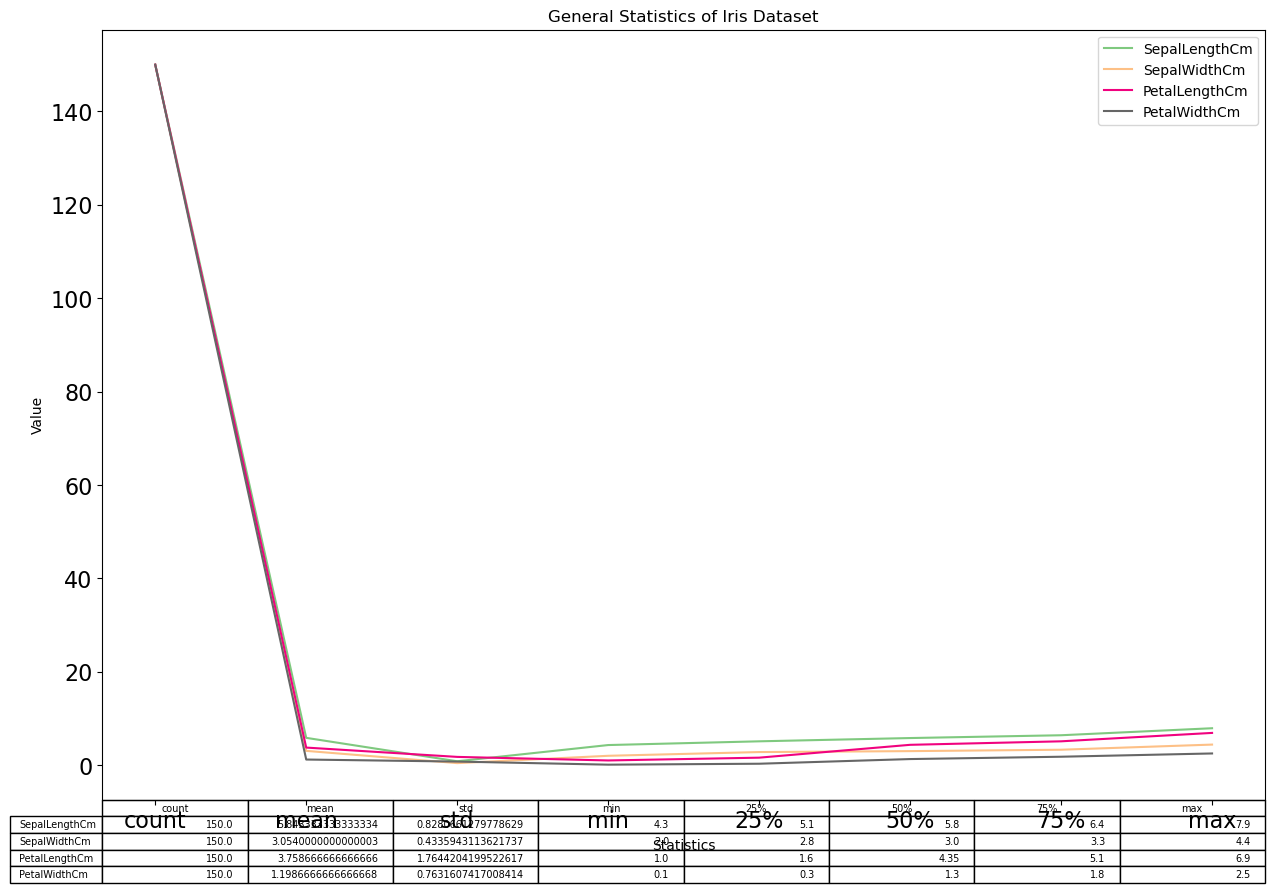

In [15]:
import matplotlib.pyplot as plt
new_data.describe().plot(kind = "line",fontsize=16, figsize = (15,10), table = True, colormap="Accent")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")
plt.show()

2. observe the frequency of labels 

In [16]:
# get observations of each species (setosa, versicolor, virginica) from iris data
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

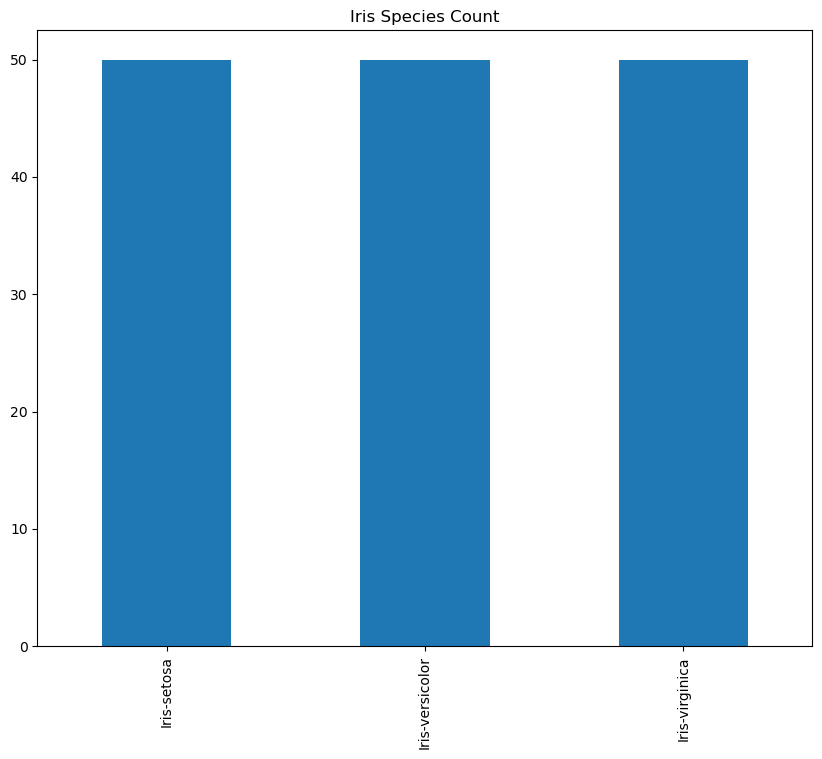

In [31]:
# observe label distribution with bar
ax=plt.subplots(1,1,figsize=(10,8))
new_data['Species'].value_counts().plot.bar()
plt.title("Iris Species Count")
plt.show()


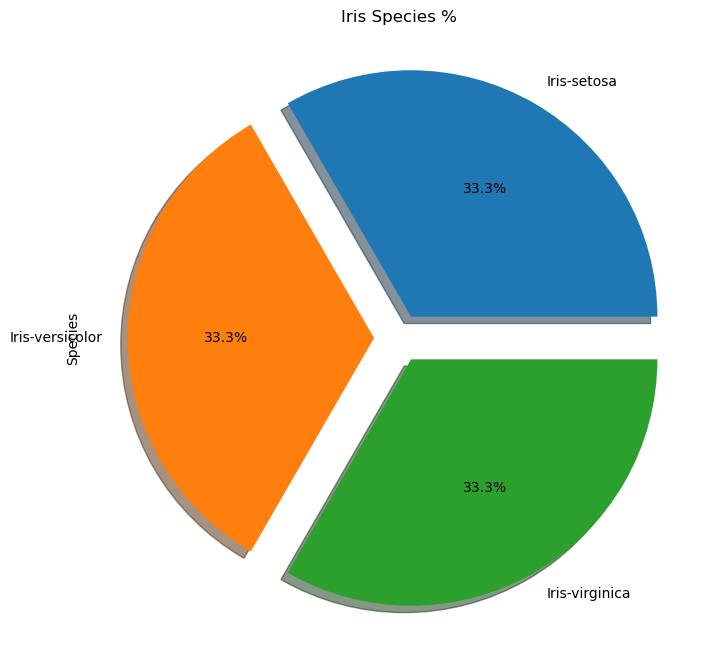

In [25]:
# observe label distribution with pie

ax=plt.subplots(1,1,figsize=(10,8))
new_data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

3. Correlations 

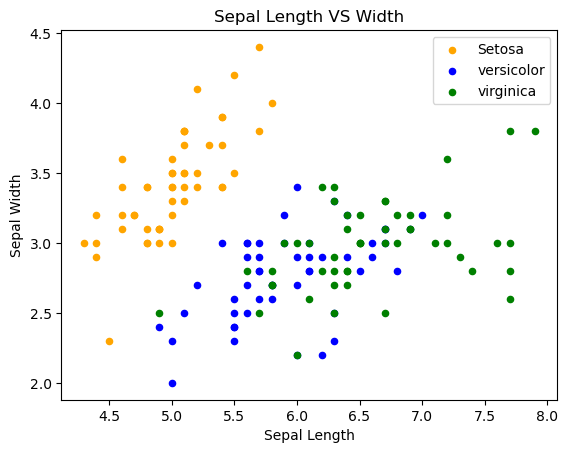

In [34]:
# to find relationship between the sepal length and width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
plt.show()

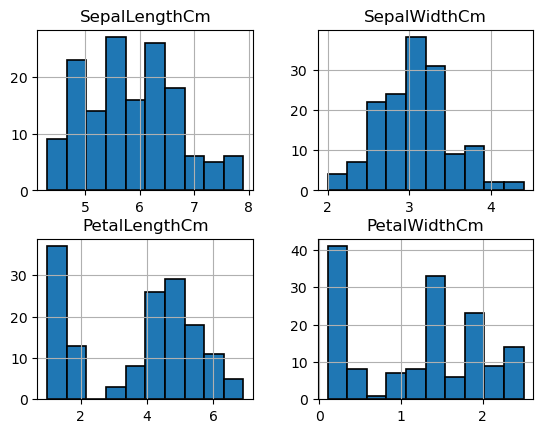

In [16]:
#  to see how the length and width of SepalLength, SepalWidth, PetalLength, PetalWidth are distributed
new_data = data.drop('Id',axis=1)
new_data.hist(edgecolor='black', linewidth=1.2)
plt.show()

In [ ]:
# Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.
import seaborn as sns
plt.figure()
sns.pairplot(data.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

## jointplot
https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php#EDITOR

In [ ]:
# a joinplot to describe individual distributions on the same plot between Sepal length and Sepal width
import seaborn as sns

sns.jointplot("SepalLengthCm", "SepalWidthCm", data=data, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6) 
plt.show()
plt.show()

# Machearn learning algorithms

## Split train and test data

In [17]:
X = new_data.iloc[:, :-1].values
Y = new_data.iloc[:,4].values
Y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape
Y_train.shape

(120,)

## Build model
### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

prediction = knn.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

## Evaluation Metrics

In [99]:
acc = knn.score(X_test, Y_test)
acc

0.9666666666666667

In [102]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, prediction)
matrix


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [104]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       0.90      1.00      0.95         9\n Iris-virginica       1.00      0.91      0.95        11\n\n       accuracy                           0.97        30\n      macro avg       0.97      0.97      0.97        30\n   weighted avg       0.97      0.97      0.97        30\n'

## Feature selection



1. employ sklearn.feature_selection to select features directly

In [84]:
# define feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X_train, Y_train)
print(X_selected.shape)

(120, 2)


2. Coefficients as Feature Importance (Linear models)
Linear models fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

We will:
    1). fit a model on the dataset to find the coefficients,
    2). summarize the importance scores for each input feature,
    3). finally create a bar chart to get an idea of the relative importance of the features.
    
Since this task is classification task, we apply LogisticRegression(), if it is regression, we consider LinearRegression().

[[-0.40101269  0.90180539 -2.35833499 -1.00442821]
 [ 0.50112194 -0.21891975 -0.10807808 -0.96733108]
 [-0.10010924 -0.68288565  2.46641307  1.97175929]]
Feature: 0, Score: 0.90181
Feature: 1, Score: 0.50112
Feature: 2, Score: 2.46641


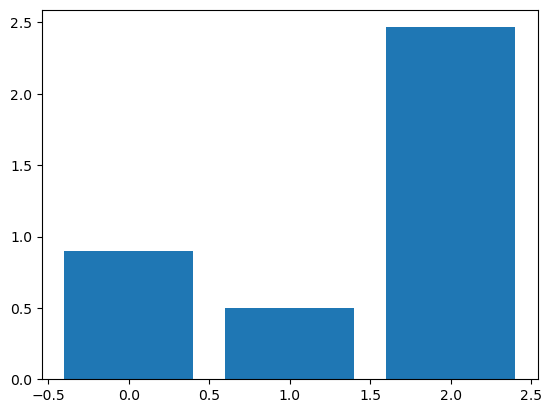

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fit the model
model.fit(X_train, Y_train)
print(model.coef_)
# get importance
importance = [max(model.coef_[i]) for i in range(len(model.coef_))]
# print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

3. Coefficients as Feature Importance (Decision tree models)
Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

*CART Feature Importance*
We can use the CART algorithm for feature importance implemented in scikit-learn as the DecisionTreeRegressor and DecisionTreeClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.



In [107]:
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.03127
Feature: 2, Score: 0.07655
Feature: 3, Score: 0.89218


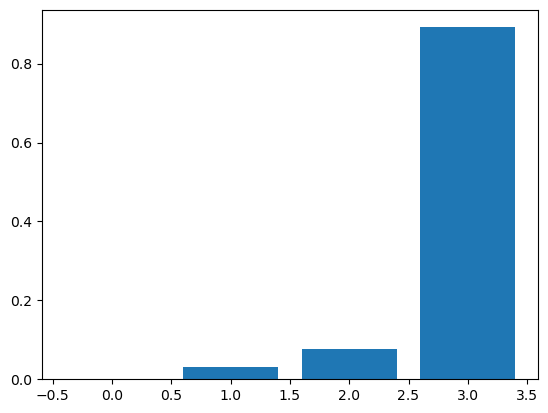

In [20]:
# decision tree for feature importance on a classification problem
# regression: DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
le = LabelEncoder()
new_data['Species'] = le.fit_transform(new_data['Species'])

emb_X = new_data.iloc[:, 0:4].values
emb_Y = new_data.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(emb_X, emb_Y, test_size = 0.2)


# define the model
decisiont = DecisionTreeClassifier()
# fit the model
decisiont.fit(x_train, y_train)
# get importance
importance = decisiont.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

4. Coefficients as Feature Importance (Random Forest models)
RandomForestRegressor() for regression


Feature: 0, Score: 0.09117
Feature: 1, Score: 0.02606
Feature: 2, Score: 0.43259
Feature: 3, Score: 0.45018


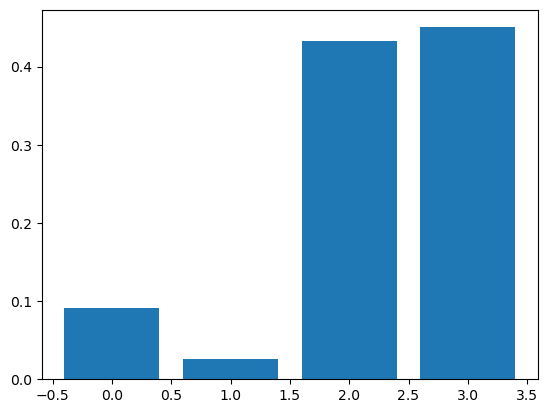

In [21]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

5. Coefficients as Feature Importance (XGBoost Classification models)
XGBRegressor() for regression

6. Permutation Feature Importance for Classification
Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.



Feature: 0, Score: -0.00500
Feature: 1, Score: -0.00500
Feature: 2, Score: 0.54833
Feature: 3, Score: 0.10000


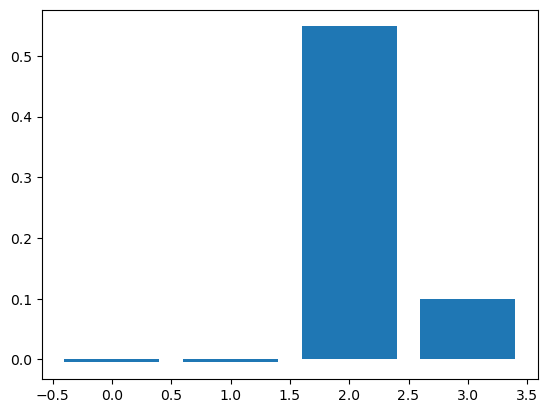

In [23]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

7. Feature Selection with Importance
### without feature selection:


In [26]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
# evaluate the model
yhat = model.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.67


In [27]:

# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=4)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 86.67
